# Long-Short Return Calculation

We are calculating the returns of a 130:30 long-short strategy on 30 selected stocks on the basis historical prices.

In [33]:
# importing the library
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print('Libraries uploaded.')

Libraries uploaded.


In [34]:
# defining relevant functions
def firstday(temp):
    return temp.head(1).index

def lastday(temp):
    return temp.tail(1).index

def numdays(i, j):
    if(i in {1, 3, 5, 7, 8, 10, 12}):
        return 31
    elif(i in {4, 6, 9, 11}):
        return 30
    elif(i == 2):
        if(j%100 == 0):
            if(j%400 == 0):
                return 29
            else:
                return 28
        elif((j%100 != 0) and (j%4 == 0)):
            return 29
        else:
            return 28
print('Functions defined.')

Functions defined.


In [35]:
# importing data
aapl = pd.read_csv('AAPL.csv')
abt = pd.read_csv('ABT.csv')
apd = pd.read_csv('APD.csv')
axp = pd.read_csv('AXP.csv')
bac = pd.read_csv('BAC.csv')
bax = pd.read_csv('BAX.csv')
bdx = pd.read_csv('BDX.csv')
cag = pd.read_csv('CAG.csv')
cms = pd.read_csv('CMS.csv')
cnp = pd.read_csv('CNP.csv')
cost = pd.read_csv('COST.csv')
gis = pd.read_csv('GIS.csv')
gps = pd.read_csv('GPS.csv')
has = pd.read_csv('HAS.csv')
hes = pd.read_csv('HES.csv')
hrb = pd.read_csv('HRB.csv')
intc = pd.read_csv('INTC.csv')
jnj = pd.read_csv('JNJ.csv')
jpm = pd.read_csv('JPM.csv')
jwn = pd.read_csv('JWN.csv')
lmt = pd.read_csv('LMT.csv')
mat = pd.read_csv('MAT.csv')
msft = pd.read_csv('MSFT.csv')
mu = pd.read_csv('MU.csv')
oxy = pd.read_csv('OXY.csv')
px = pd.read_csv('PX.csv')
rtn = pd.read_csv('RTN.csv')
t = pd.read_csv('T.csv')
vz = pd.read_csv('VZ.csv')
wmt = pd.read_csv('WMT.csv')
print('Data imported.')

Data imported.


In [36]:
# making lists of stock prices and names
order = [aapl, msft, mat, has, gps, jwn, gis, cag, wmt, cost, oxy, hes, jpm, bac, axp, hrb, abt, jnj, bax, bdx, lmt, rtn, intc, mu, apd, px, t, vz, cnp, cms]
ord_list = ['aapl', 'msft', 'mat', 'has', 'gps', 'jwn', 'gis', 'cag', 'wmt', 'cost', 'oxy', 'hes', 'jpm', 'bac', 'axp', 'hrb', 'abt', 'jnj', 'bax', 'bdx', 'lmt', 'rtn', 'intc', 'mu', 'apd', 'px', 't', 'vz', 'cnp', 'cms']
print('Lists created.')

Lists created.


In [37]:
# creating price master
prices = pd.DataFrame()
prices['Date'] = order[0]['Date']
prices['Date'] = pd.to_datetime(prices['Date'])
for i in range(30):
    prices = pd.concat([prices, order[i]['Adj Close']], axis = 1)
    prices = prices.rename(columns = {'Adj Close' : ord_list[i]})
prices = prices.set_index('Date')
print('Price master created.')

Price master created.


In [38]:
# importing the long-short strategy
strategy = pd.read_csv('Decisions11.csv')
strategy = strategy.rename(columns = {'Unnamed: 0' : 'Date'})
strategy = strategy.set_index('Date')
strategy = strategy.values
print('Strategy matrix created.')

Strategy matrix created.


In [39]:
# calculating the starting portfolio
mon = 0
long = 1.3
short = -0.3
portfolio = 15000000
shares = np.zeros(30)
temp = prices.ix[dt.date(year = 1997, month = 12,day = 1):dt.date(year = 1997, month = 12, day = 31)]
cur_prices = prices.ix[dt.date(year = lastday(temp).year[0], month = lastday(temp).month[0], day = lastday(temp).day[0])]
for i in range(30):
    if(strategy[mon][i] == 1):
        shares[i] = ((portfolio*long)/15)/cur_prices[i]
    elif(strategy[mon][i] == -1):
        shares[i] = ((portfolio*short)/15)/cur_prices[i]
init_shares = shares
print('Initial portfolio calculated.')

Initial portfolio calculated.


C:\Users\Bhavya\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [40]:
# updating portfolio
port_history = []
shares_history = []
mon = 0
for k in range(1998,2018):
    for j in range(1,13):
        temp = prices.ix[dt.date(year = k, month = j,day = 1):dt.date(year = k, month = j, day = int(numdays(j,k)))]
        cur_prices = prices.ix[dt.date(year = lastday(temp).year[0], month = lastday(temp).month[0], day = lastday(temp).day[0])]
        capital = shares*cur_prices
        port_history.append(capital)
        for i in range(30):
            if(strategy[mon][i] == 1):
                shares[i] = ((sum(capital)*long)/15)/cur_prices[i]
            elif(strategy[mon][i] == -1):
                shares[i] = ((sum(capital)*short)/15)/cur_prices[i]
        mon = mon + 1
        shares_history.append(shares)
    print(k,' year completed.')

1998  year completed.
1999  year completed.
2000  year completed.
2001  year completed.
2002  year completed.
2003  year completed.
2004  year completed.
2005  year completed.
2006  year completed.
2007  year completed.
2008  year completed.
2009  year completed.
2010  year completed.
2011  year completed.
2012  year completed.
2013  year completed.
2014  year completed.
2015  year completed.
2016  year completed.
2017  year completed.


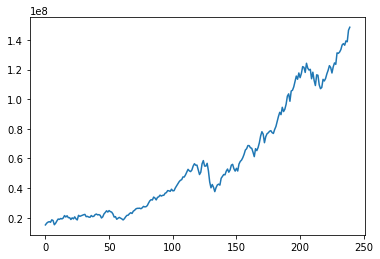

In [41]:
# plotting the return
l = []
for i in range(240):
    l.append((sum(port_history[i])))
plt.plot(l)
plt.show()